<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/HJA_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import geopandas as gpd

In [5]:
from google.colab import drive

# This will prompt you to authorize access to your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
disturbance = pd.read_csv('/content/drive/MyDrive/summarized_disturbance_output_with_env_var.csv')

<ipython-input-6-797b7389ca66>:1: DtypeWarning: Columns (20,33,40) have mixed types. Specify dtype option on import or set low_memory=False.
  disturbance = pd.read_csv('/content/drive/MyDrive/summarized_disturbance_output_with_env_var.csv')


In [7]:
study = gpd.read_file('/content/study_subset.gpkg')

In [8]:
# [column for column in disturbance.columns]

In [9]:
disturbance['yad'] = disturbance['gedi_year'] - disturbance['yod_mean']

In [10]:
keep_columns = ['agbd',
 'dist_id',
 'yad',
#  'yod_mean',
#  'gedi_year',
  'HUC8',
  'HUC10',
  'HUC12',
#   'dur_sum',
#  'band_year',
#  'yod_mean',
#  'yod_std',
#  'yod_sum',
 'mag_mean',
 'mag_std',
#  'mag_sum',
 'dur_mean',
 'dur_std',
#  'dur_sum',
 'preval_mean',
 'preval_std',
#  'preval_sum',
 'rate_mean',
 'rate_std',
#  'rate_sum',
 'dsnr_mean',
 'dsnr_std',
#  'dsnr_sum',
#  'xmin',
#  'ymin',
#  'xmax',
#  'ymax',
#  'dist_id',
 'mean.elevation',
 'mean.slope',
 'mean.aspect',
 'tpi_gpkg',
 'aet',
 'def',
 'pdsi',
 'pet',
 'pr',
 'ro',
 'soil',
 'srad',
 'swe',
 'tmmn',
 'tmmx',
 'vap',
 'vpd',
 'vs',
#  'gedi_year',
 'dist_count',
#  'one_column',
 'dist_instance']

In [11]:
# [column for column in disturbance.columns]

In [12]:
rf_ready = disturbance[
     disturbance['HUC12'].astype(str).isin(study['HUC12'].astype(str))
][
     disturbance["dist_count"] == disturbance["dist_instance"]
][
     keep_columns

].dropna()


<ipython-input-12-f6a63e5c8694>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rf_ready = disturbance[


In [13]:
rf_ready = rf_ready.groupby([ 'dist_id','dist_count', 'yad','HUC8','HUC10','HUC12']).mean()

In [14]:
# rf_ready

In [15]:
rf_ready = rf_ready.reset_index()

In [16]:
rf_ready = rf_ready[rf_ready['yad'] >0]

In [17]:
rf_ready = rf_ready[rf_ready['dist_count'] != 1]

In [18]:
set(rf_ready['dist_count'])

{2, 3, 4, 5}

In [19]:
# X = rf_ready.drop(columns=['agbd'])

In [20]:
# disturbance[disturbance["dist_count"] == disturbance["dist_instance"]]

In [21]:
# rf_ready

In [22]:
y = rf_ready['agbd']
X = rf_ready.drop(columns=['agbd','dist_id','dist_instance'])

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# # Load a sample dataset (Iris dataset)
# data = load_iris()
# X = data.data  # Features
# y = data.target  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestRegressor(n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)



In [24]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 13078.818373468153
R^2 Score: 0.08910372279518108


In [25]:
# dist_one_rf_classifier  = rf_classifier

In [26]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
16      mean.slope    0.101466
1              yad    0.068751
18        tpi_gpkg    0.068308
17     mean.aspect    0.060819
9      preval_mean    0.055216
15  mean.elevation    0.050200
10      preval_std    0.047297
21            pdsi    0.046717
14        dsnr_std    0.042439
26            srad    0.035489
13       dsnr_mean    0.034109
11       rate_mean    0.032147
5         mag_mean    0.030214
27             swe    0.027550
25            soil    0.026945
23              pr    0.025525
20             def    0.023631
6          mag_std    0.023244
19             aet    0.023135
12        rate_std    0.022896
32              vs    0.022682
30             vap    0.022549
24              ro    0.022455
29            tmmx    0.019878
28            tmmn    0.019775
31             vpd    0.016409
22             pet    0.016193
0       dist_count    0.005473
3            HUC10    0.003324
4            HUC12    0.003016
2             HUC8    0.002148
8       

In [27]:
# X_test

In [28]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming your DataFrame is named `rf_dt`
# Filter the data similar to the R code
plot_test_dt = disturbance[disturbance['dist_instance'] == disturbance['dist_count']][keep_columns].copy()
plot_test_dt = plot_test_dt.groupby([ 'dist_count','yad', 'HUC8', 'HUC10', 'HUC12']).mean()

In [30]:
plot_test_dt = plot_test_dt.reset_index()

In [31]:
figure_data = plot_test_dt[ (plot_test_dt['dist_count'] ==1) & (plot_test_dt['yad'] >0)]


Disturbance Count 1 - R²: 0.04
Disturbance Count 2 - R²: 0.05
Disturbance Count 3 - R²: 0.00
Disturbance Count 4 - R²: 0.00
Disturbance Count 5 - R²: 0.00
Disturbance Count 6 - R²: 0.07
Disturbance Count 7 - R²: 0.08
Disturbance Count 8 - R²: nan


<ipython-input-33-8449ecd7ab0e>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['agbd_pred_lm'] =  model.predict(X)
<ipython-input-33-8449ecd7ab0e>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['agbd_pred_lm'] =  model.predict(X)
<ipython-input-33-8449ecd7ab0e>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

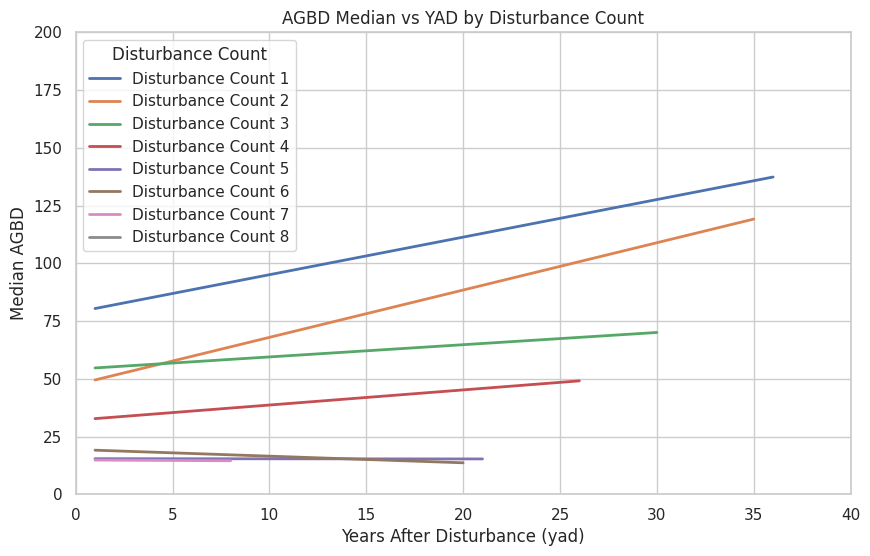

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Filter the data to include only yad > 0
filtered_data = plot_test_dt[plot_test_dt['yad'] > 0]

# Get unique disturbance counts
dist_counts = filtered_data['dist_count'].unique()

pred_list = []
dist_slope_int_list = []
# Plot each disturbance count separately
for dist_count in dist_counts:
    # Filter data for the current disturbance count
    data_subset = filtered_data[filtered_data['dist_count'] == dist_count]

    # Perform linear regression on the subset
    X = data_subset['yad'].values.reshape(-1, 1)
    y = data_subset['agbd'].values

    model = LinearRegression().fit(X, y)

    # Generate predictions only for the range of X
    X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_pred)

    # Calculate R² score
    r2 = r2_score(y, model.predict(X))
    print(f"Disturbance Count {dist_count} - R²: {r2:.2f}")

    # Plot the line within the actual data range
    plt.plot(X_pred, y_pred, label=f"Disturbance Count {dist_count}", linewidth=2)

    # set_y_pred

    data_subset['agbd_pred_lm'] =  model.predict(X)
    pred_list.append(data_subset)

    dist_slope_int_list.append([dist_count,model.coef_[0],model.intercept_])
# Set plot limits and labels
plt.xlim(0, 40)
plt.ylim(0, 200)
plt.xlabel('Years After Disturbance (yad)')
plt.ylabel('Median AGBD')
plt.title('AGBD Median vs YAD by Disturbance Count')
plt.legend(title='Disturbance Count')
plt.show()


In [34]:
result = pd.concat(pred_list)

Disturbance Count 8 - R²: 0.73


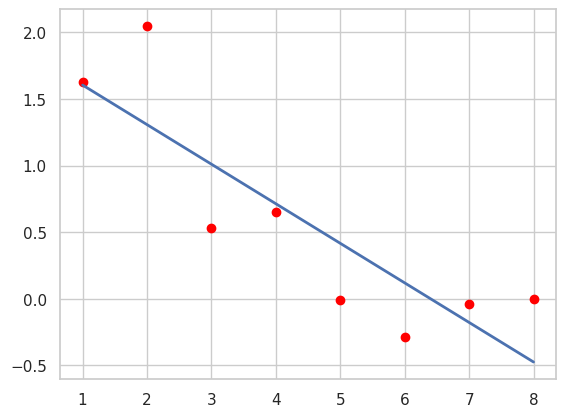

In [35]:
# Perform linear regression on the subset
X = np.array([element[0] for element in dist_slope_int_list]).reshape(-1, 1)
y = np.array([element[1] for element in dist_slope_int_list]).reshape(-1, 1)

model = LinearRegression().fit(X, y)

# Generate predictions only for the range of X
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Calculate R² score
r2 = r2_score(y, model.predict(X))
print(f"Disturbance Count {dist_count} - R²: {r2:.2f}")

plt.scatter(X, y, color='red', label="Points")
# Plot the line within the actual data range
plt.plot(X_pred, y_pred, label=f"Disturbance Count {dist_count}", linewidth=2)

In [36]:
rf_ready = result[keep_columns]
rf_ready['agbd_dif'] = ((result["agbd"] - result['agbd_pred_lm'])*2)/(result["agbd_pred_lm"] +result["agbd"])

In [37]:
rf_ready

,agbd,dist_id,yad,HUC8,HUC10,HUC12,mag_mean,mag_std,dur_mean,dur_std,...,srad,swe,tmmn,tmmx,vap,vpd,vs,dist_count,dist_instance,agbd_dif
683,61.189609,19542.154762,1,17090003,1709000301,170900030101,334.357030,65.605189,1.0,0.0,...,1594.108587,0.004597,60.809753,177.198798,965.274255,63.933361,312.182892,1,1.0,-0.271278
684,47.006680,19831.930233,1,17090003,1709000301,170900030102,337.799721,66.150126,1.0,0.0,...,1595.011632,0.003876,63.656654,177.973514,961.433460,66.012920,312.356267,1,1.0,-0.524129
685,39.391048,19935.537736,1,17090003,1709000301,170900030103,365.352928,78.986078,1.0,0.0,...,1580.930383,0.004586,64.313155,178.991391,1000.463433,62.818606,310.484670,1,1.0,-0.684607
686,153.111045,18618.919355,1,17090003,1709000301,170900030104,337.508984,71.491793,1.0,0.0,...,1566.723299,0.012391,60.167861,171.899584,978.272886,57.691869,310.797957,1,1.0,0.622833
687,142.655665,18870.346667,1,17090003,1709000301,170900030105,353.918506,77.799007,1.0,0.0,...,1563.967638,0.002593,59.136204,169.953744,969.631142,56.349210,314.823034,1,1.0,0.558278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,15.063704,12179.000000,1,17090003,1709000301,170900030110,535.818182,59.630404,1.0,0.0,...,1561.166626,0.000000,71.472221,183.027776,1027.055481,67.111108,306.944448,7,7.0,0.018148
11683,14.432023,23476.000000,3,17090005,1709000506,170900050604,548.428571,85.493287,1.0,0.0,...,1525.483350,0.000000,66.333333,183.416669,1009.116663,66.850002,294.833331,7,7.0,-0.019000
11684,14.028793,33675.000000,7,17090005,1709000506,170900050604,480.222222,159.511600,1.0,0.0,...,1533.941638,0.041667,68.249999,185.158333,1031.916663,65.975000,303.958331,7,7.0,-0.035858
11685,15.017219,34470.000000,8,17090003,1709000301,170900030110,449.714286,49.643628,1.0,0.0,...,1559.933374,0.025000,70.641668,183.808337,1041.766663,64.383332,310.674997,7,7.0,0.035110


In [38]:
# y_train

In [39]:
y = rf_ready[['agbd_dif','agbd']]
# y_agbd = rf_ready['agbd']
X = rf_ready.drop(columns=['agbd_dif','agbd'])

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# # Load a sample dataset (Iris dataset)
# data = load_iris()
# X = data.data  # Features
# y = data.target  # Labels

# Split the data into training and testing sets
# _, _, _, y_agbd_test = train_test_split(X, y_agbd, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_agbd_train = y_train['agbd']
y_agbd_test = y_test['agbd']

y_train = y_train['agbd_dif']
y_test = y_test['agbd_dif']

# Initialize the Random Forest classifier
rf_classifier = RandomForestRegressor(n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)



In [40]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.21873538966488182
R^2 Score: 0.5574842051046172


In [41]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
15  mean.elevation    0.257980
16      mean.slope    0.180544
9      preval_mean    0.052911
0          dist_id    0.048542
17     mean.aspect    0.027193
18        tpi_gpkg    0.026986
10      preval_std    0.025538
14        dsnr_std    0.024824
13       dsnr_mean    0.023848
21            pdsi    0.021543
26            srad    0.021270
5         mag_mean    0.021185
11       rate_mean    0.018780
27             swe    0.018157
29            tmmx    0.016373
25            soil    0.015860
19             aet    0.015749
31             vpd    0.015716
34   dist_instance    0.015281
1              yad    0.014827
33      dist_count    0.014658
12        rate_std    0.014368
32              vs    0.014132
20             def    0.014048
24              ro    0.013631
30             vap    0.013598
6          mag_std    0.013350
28            tmmn    0.012749
23              pr    0.011932
22             pet    0.010990
3            HUC10    0.001289
4       

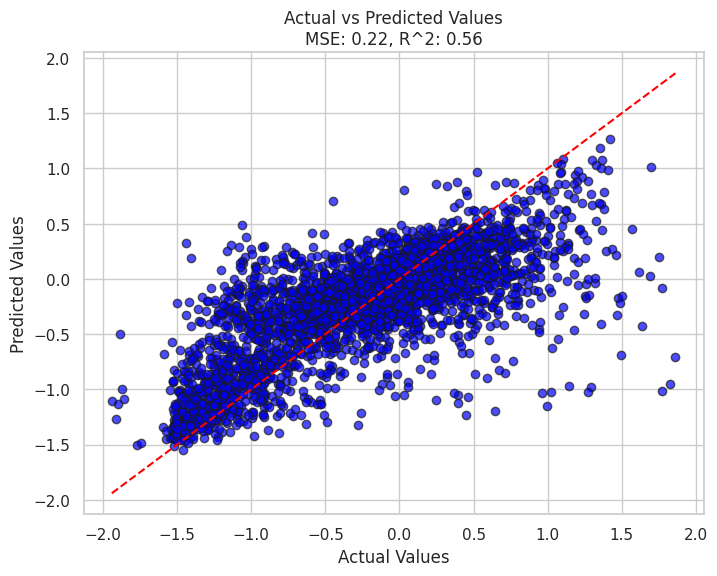

In [42]:

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values\nMSE: {mse:.2f}, R^2: {r2:.2f}')
plt.grid(True)
plt.show()

In [43]:
X_test['dist_count']

,dist_count
1401,1
2261,1
4974,1
716,1
10701,3
...,...
879,1
11404,4
7580,2
7769,2


In [44]:
pred_adj = [(yad*dist_slope_int_list[dist_count-1][1]+yad*dist_slope_int_list[dist_count-1][2])+
 (yad*dist_slope_int_list[dist_count-1][1]+yad*dist_slope_int_list[dist_count-1][2])*ypred
 for yad, dist_count, ypred in zip(X_test["yad"],X_test['dist_count'], y_pred)]

Disturbance Count 8 - R²: 0.24


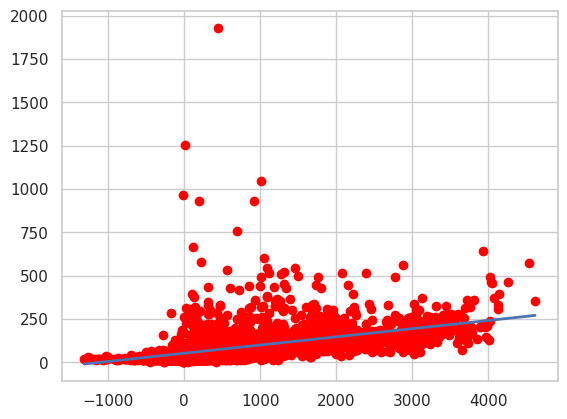

In [45]:
# Perform linear regression on the subset
X = np.array(pred_adj).reshape(-1, 1)
y = np.array(y_agbd_test).reshape(-1, 1)

model = LinearRegression().fit(X, y)

# Generate predictions only for the range of X
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_pred)

# Calculate R² score
r2 = r2_score(y, model.predict(X))
print(f"Disturbance Count {dist_count} - R²: {r2:.2f}")

plt.scatter(X, y, color='red', label="Points")
# Plot the line within the actual data range
plt.plot(X_pred, y_pred, label=f"Disturbance Count {dist_count}", linewidth=2)

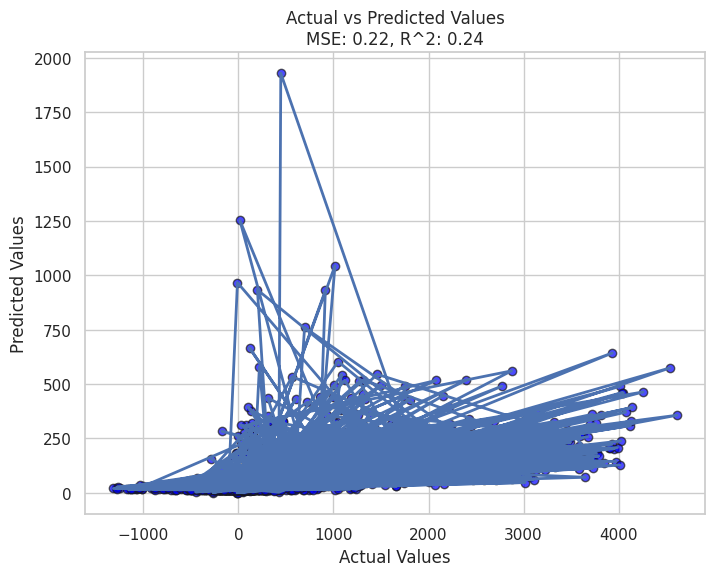

In [46]:

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(pred_adj,y_agbd_test, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
# Plot the line within the actual data range
plt.plot(pred_adj, y_agbd_test, label=f"Disturbance Count {dist_count}", linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values\nMSE: {mse:.2f}, R^2: {r2:.2f}')
plt.grid(True)
plt.show()